In [39]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
vector = tf.constant([[4,5,6]], dtype=tf.float32)
eucNorm = tf.norm(vector, ord="euclidean")

with tf.Session() as sess:
    print(sess.run(eucNorm))

8.774964


In [41]:
matrix1 = [[1.0, 2.0], [3.0, 40]]
matrix2 = np.array([[1.0, 2.0], [3.0, 40]], dtype=np.float32)
matrix3 = tf.constant([[1.0, 2.0], [3.0, 40]])

print(type(matrix1))
print(type(matrix2))
print(type(matrix3))

tensorForM1 = tf.convert_to_tensor(matrix1, dtype=tf.float32)
tensorForM2 = tf.convert_to_tensor(matrix2, dtype=tf.float32)
tensorForM3 = tf.convert_to_tensor(matrix3, dtype=tf.float32)

print(type(tensorForM1))
print(type(tensorForM2))
print(type(tensorForM3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [42]:
mat1 = tf.constant([[4, 5, 6],[3,2,1]])
mat2 = tf.constant([[7, 8, 9],[10, 11, 12]])

mult = tf.multiply(mat1, mat2)

dotprod = tf.matmul(mat1, tf.transpose(mat2))

with tf.Session() as sess:
    print(sess.run(mult))
    print(sess.run(dotprod))

[[28 40 54]
 [30 22 12]]
[[122 167]
 [ 46  64]]


In [43]:
mat = tf.constant([
 [0, 1, 2],
 [3, 4, 5],
 [6, 7, 8]
], dtype=tf.float32)

mat = tf.trace(mat)

with tf.Session() as sess:
    print(sess.run(mat))

12.0


In [44]:
x = [[1,2,3],[4,5,6]]
x = tf.convert_to_tensor(x)
xtrans = tf.transpose(x)

y=([[[1,2,3],[6,5,4]],[[4,5,6],[3,6,3]]])
y = tf.convert_to_tensor(y)
ytrans = tf.transpose(y, perm=[0, 2, 1])

with tf.Session() as sess:
   print(sess.run(xtrans))
   print(sess.run(ytrans))

[[1 4]
 [2 5]
 [3 6]]
[[[1 6]
  [2 5]
  [3 4]]

 [[4 3]
  [5 6]
  [6 3]]]


In [45]:
mat = tf.constant([
 [0, 1, 2],
 [3, 4, 5],
 [6, 7, 8]
], dtype=tf.float32)

diag_mat = tf.diag_part(mat)

mat = tf.diag([1,2,3,4])

with tf.Session() as sess:
   print(sess.run(diag_mat))
   print(sess.run(mat))

[0. 4. 8.]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [46]:
identity = tf.eye(3, 3)

with tf.Session() as sess:
   print(sess.run(identity))  

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [47]:
# x2+y2+dx+ey+f = 0
# dx+ey+f=−(x2+y2) ==> AX = B
# d, e, f

points = tf.constant([[2,1], [0,5], [-1,2]], dtype=tf.float64)
X = tf.constant([[2,1,1], [0,5,1], [-1,2,1]], dtype=tf.float64)
B = -tf.constant([[5], [25], [5]], dtype=tf.float64)

A = tf.matrix_solve(X,B)

with tf.Session() as sess:
    result = sess.run(A)
    D, E, F = result.flatten()
    print("x**2 + y**2 + {D}x + {E}y + {F} = 0".format(**locals()))

x**2 + y**2 + -2.0x + -6.0y + 5.0 = 0


In [48]:
xMatrix = np.array([[0,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,0,1,1,1,0]], dtype=np.float32)

X_tensor = tf.convert_to_tensor(xMatrix, dtype=tf.float32)

# tensorflow 
with tf.Session() as sess:
    s, U, Vh = sess.run(tf.svd(X_tensor, full_matrices=False))
    
print(U)
print(s)
print(Vh)

# numpy 
la = np.linalg
U, s, Vh = la.svd(xMatrix, full_matrices=False)

print(U)
print(s)
print(Vh)

[[ 5.2412510e-01  5.7285953e-01  9.5445983e-02  3.8322863e-01
   1.7696340e-01 -1.7609245e-01  4.1918576e-01  5.5770501e-02]
 [ 5.9443843e-01 -6.3012099e-01 -1.7020741e-01  3.1003842e-01
  -1.8406223e-01 -2.3477782e-01 -1.2953560e-01 -1.3681325e-01]
 [ 2.5627419e-01 -2.7401772e-01  1.5981109e-01  6.5319000e-08
   5.7898474e-01  6.3655090e-01  2.1452342e-07  3.0541500e-01]
 [ 2.8563744e-01  2.4791259e-01  3.5461003e-01 -7.3189922e-02
  -4.4578463e-01  8.3614528e-02 -5.4872149e-01  4.6801224e-01]
 [ 1.9313939e-01 -3.3849932e-02 -5.0079018e-01 -4.2846254e-01
  -3.4711048e-01  1.5548302e-01  4.6866363e-01  4.0357691e-01]
 [ 3.0513468e-01  2.9398909e-01 -2.2343382e-01 -1.9161446e-01
  -1.2746094e-01  4.9121961e-01 -2.0959236e-01 -6.5753585e-01]
 [ 1.8248993e-01  1.6102767e-01 -3.9784253e-01 -3.8322884e-01
   5.1292336e-01 -4.2757425e-01 -4.1918600e-01  1.1831376e-01]
 [ 2.4689846e-01 -1.5725437e-01  5.9299219e-01 -6.2007719e-01
   3.2186557e-02 -2.3106529e-01  2.5907102e-01 -2.3797689e-01]]

In [49]:
xMatrix = np.array([[0,2,1,0,0,0,0,0],
              [2,0,0,1,0,1,0,0],
              [1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,0,0],
              [0,0,0,1,0,0,0,1],
              [0,1,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,1],
              [0,0,0,0,1,1,1,0]], dtype=np.float32)

def pca(mat):
    mat = tf.constant(mat, dtype=tf.float32)
    mean = tf.reduce_mean(mat, 0)
    less = mat - mean
    s, u, v = tf.svd(less, full_matrices=True, compute_uv=True)

    s2 = s ** 2
    variance_ratio = s2 / tf.reduce_sum(s2)

    with tf.Session() as session:
        run = session.run([variance_ratio])
    return run


if __name__ == '__main__':
    print(pca(xMatrix))

[array([4.1594949e-01, 2.0839056e-01, 1.9092928e-01, 8.3643854e-02,
       5.5549424e-02, 2.4604747e-02, 2.0932643e-02, 3.5754010e-16],
      dtype=float32)]


In [63]:
from tensorflow.examples.tutorials.mnist import input_data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
data = input_data.read_data_sets("~/.keras/datasets", one_hot=True)

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

numNeuronsInDeepLayer = 30
w1 = tf.Variable(tf.truncated_normal([784, numNeuronsInDeepLayer]))
b1 = tf.Variable(tf.truncated_normal([1, numNeuronsInDeepLayer]))
w2 = tf.Variable(tf.truncated_normal([numNeuronsInDeepLayer, 10]))
b2 = tf.Variable(tf.truncated_normal([1, 10]))

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

data = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

numNeuronsInDeepLayer = 30
w1 = tf.Variable(tf.truncated_normal([784, numNeuronsInDeepLayer]))
b1 = tf.Variable(tf.truncated_normal([1, numNeuronsInDeepLayer]))
w2 = tf.Variable(tf.truncated_normal([numNeuronsInDeepLayer, 10]))
b2 = tf.Variable(tf.truncated_normal([1, 10]))

ModuleNotFoundError: No module named 'tensorflow.examples'

5


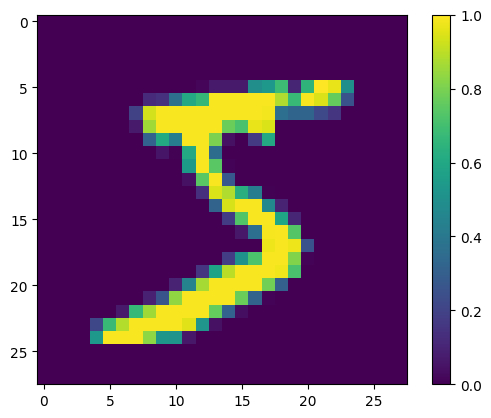

In [56]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

In [58]:
def sigmoid(x):
    sigma = tf.div(tf.constant(1.0), tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))
    return sigma

# wx+b, sigmoid 
z1 = tf.add(tf.matmul(x, w1), b1)
a1 = sigmoid(z1)
z2 = tf.add(tf.matmul(a1, w2), b2)
a2 = sigmoid(z2)

loss = tf.subtract(a2, y)

# дериватив(sigmoid)=sigmoid*(1-sigmoid)
def sigmaprime(x):
    return tf.multiply(sigmoid(x), tf.subtract(tf.constant(1.0), sigmoid(x)))

dz2 = tf.multiply(loss, sigmaprime(z2))
db2 = dz2
dw2 = tf.matmul(tf.transpose(a1), dz2)

da1 = tf.matmul(dz2, tf.transpose(w2))
dz1 = tf.multiply(da1, sigmaprime(z1))
db1 = dz1
dw1 = tf.matmul(tf.transpose(x), dz1)

eta = tf.constant(0.5)
step = [
    tf.assign(w1,
              tf.subtract(w1, tf.multiply(eta, dw1)))
    , tf.assign(b1,
                tf.subtract(b1, tf.multiply(eta,
                                             tf.reduce_mean(db1, axis=[0]))))
    , tf.assign(w2,
                tf.subtract(w2, tf.multiply(eta, dw2)))
    , tf.assign(b2,
                tf.subtract(b2, tf.multiply(eta,
                                             tf.reduce_mean(db2, axis=[0]))))
]

acct_mat = tf.equal(tf.argmax(a2, 1), tf.argmax(y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = data.train.next_batch(10)
    sess.run(step, feed_dict={x: batch_xs,
                              y: batch_ys})
    if i % 1000 == 0:
        res = sess.run(acct_res, feed_dict=
        {x: data.test.images[:1000],
         y: data.test.labels[:1000]})
        print(res)

AttributeError: 'tuple' object has no attribute 'train'

Epoch is: 0050 loss= 0.181245729 W= 0.42958528 b= -0.49210075
Epoch is: 0100 loss= 0.169153243 W= 0.41882718 b= -0.4147099
Epoch is: 0150 loss= 0.158455208 W= 0.40870798 b= -0.34191483
Epoch is: 0200 loss= 0.148990810 W= 0.39918968 b= -0.27344278
Epoch is: 0250 loss= 0.140618041 W= 0.39023674 b= -0.2090377
Epoch is: 0300 loss= 0.133210927 W= 0.38181543 b= -0.14845741
Epoch is: 0350 loss= 0.126658142 W= 0.3738943 b= -0.091475
Epoch is: 0400 loss= 0.120861135 W= 0.36644357 b= -0.037876643
Epoch is: 0450 loss= 0.115732841 W= 0.35943544 b= 0.012538542
Epoch is: 0500 loss= 0.111196131 W= 0.35284328 b= 0.059959643
Epoch is: 0550 loss= 0.107182771 W= 0.34664285 b= 0.104564436
Epoch is: 0600 loss= 0.103632435 W= 0.3408106 b= 0.14652027
Epoch is: 0650 loss= 0.100491717 W= 0.33532467 b= 0.18598449
Epoch is: 0700 loss= 0.097713396 W= 0.33016455 b= 0.223105
Epoch is: 0750 loss= 0.095255665 W= 0.3253108 b= 0.25802118
Epoch is: 0800 loss= 0.093081601 W= 0.32074547 b= 0.290863
Epoch is: 0850 loss= 0.

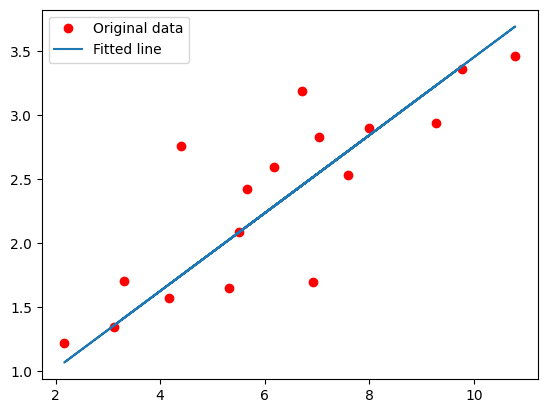

Testing... (Mean square loss Comparison)
Testing cost= 0.07886464
Absolute mean square loss difference: 0.00775674


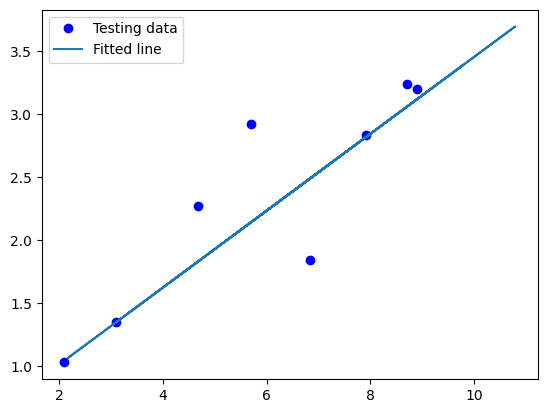

In [12]:
rndm = np.random

learningRate = 0.01
trainingEpochs = 1000
displayStep = 50

trainX = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.12])
trainY = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.34])
nSamples = trainX.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rndm.randn(), name="weight")
b = tf.Variable(rndm.randn(), name="bias")

linearModel = tf.add(tf.multiply(X, W), b)

loss = tf.reduce_sum(tf.pow(linearModel-Y, 2))/(2*nSamples)

opt = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(trainingEpochs):
        for (x, y) in zip(trainX, trainY):
            sess.run(opt, feed_dict={X: x, Y: y})

        if (epoch+1) % displayStep == 0:
            c = sess.run(loss, feed_dict={X: trainX, Y:trainY})
            print("Epoch is:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("optimization done...")
    trainingLoss = sess.run(loss, feed_dict={X: trainX, Y: trainY})
    print("Training loss=", trainingLoss, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(trainX, trainY, 'ro', label='Original data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    testX = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    testY = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(linearModel - Y, 2)) / (2 * testX.shape[0]),
        feed_dict={X: testX, Y: testY})
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(trainingLoss - testing_cost))

    plt.plot(testX, testY, 'bo', label='Testing data')
    plt.plot(trainX, sess.run(W) * trainX + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

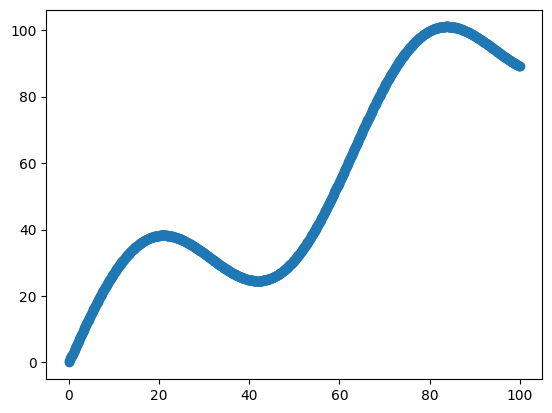

In [17]:
xData = np.arange(100, step=.1)
yData = xData + 20 * np.sin(xData/10)

plt.scatter(xData, yData)
plt.show()

nSamples = 1000
batchSize = 100

xData = np.reshape(xData, (nSamples,1))
yData = np.reshape(yData, (nSamples,1))

x = tf.placeholder(tf.float32, shape=(batchSize, 1))
y = tf.placeholder(tf.float32, shape=(batchSize, 1))

with tf.variable_scope("linearRegression"):
 W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
 b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))

 y_pred = tf.matmul(x, W) + b
 loss = tf.reduce_sum((y - y_pred)**2/nSamples)

opt = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for _ in range(500):
     indices = np.random.choice(nSamples, batchSize)

     X_batch, y_batch = xData[indices], yData[indices]

     _, loss_val = sess.run([opt, loss], feed_dict={x: X_batch, y: y_batch})

(50000, 28, 28) (50000,)


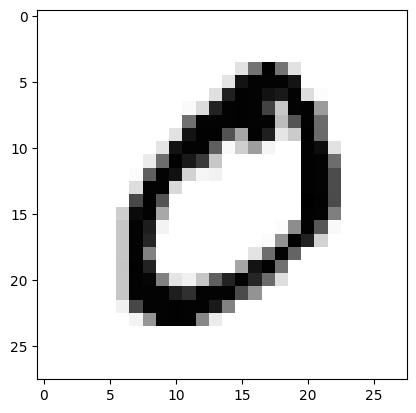

In [18]:
import keras
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
plt.imshow(X_train[1], cmap="Greys");

In [19]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

In [21]:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1

In [22]:
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')
keep_prob = tf.placeholder(tf.float32)

In [23]:
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))

weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))

weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

In [24]:
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, keep_prob)

hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, keep_prob)

predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_y,labels=input_y)) \
        + regularizer_rate*(tf.reduce_sum(tf.square(bias_0)) + tf.reduce_sum(tf.square(bias_1)))

In [26]:
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])

In [27]:
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,
                                                                         bias_0,bias_1,bias_2])

In [34]:
batch_size = 128
epochs=14
dropout_prob = 0.6

training_accuracy = []
training_loss = []
testing_accuracy = []

s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

2023-02-28 06:39:01.559733: W tensorflow/c/c_api.cc:291] Operation '{name:'Variable_5/Adam_3/Assign' id:955 op device:{requested: '', assigned: ''} def:{{{node Variable_5/Adam_3/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@Variable_5"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](Variable_5/Adam_3, Variable_5/Adam_3/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


NameError: name 'accuracy' is not defined

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

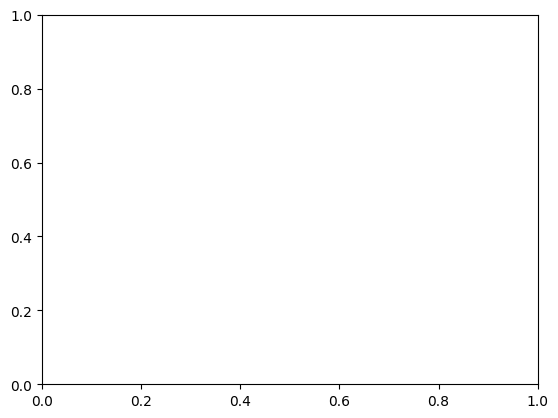

In [59]:
iterations = list(range(epochs))
plt.plot(iterations, training_accuracy, label='Train')
plt.plot(iterations, testing_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('iterations')
plt.show()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))

ERROR: Could not find a version that satisfies the requirement tensorflow-quantum (from versions: none)
ERROR: No matching distribution found for tensorflow-quantum
